# Классификация с помощью Keras

Качество лучшей модели: 1

## Импорты библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model

## Загрузка и подготовка данных

In [3]:
phone_df = pd.read_csv("data/Smartphone_chosse_preprocessed.csv")
phone_df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,1,2,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,2,6,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,4,6,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,5,9,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,1,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
phone_df.tail()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,1995,794,1,0.5,1,0,1,2,0.8,106,5,14,1222,1890,668,13,4,19,1,1,0,0
1996,1996,1965,1,2.6,1,0,0,39,0.2,187,3,3,915,1965,2032,11,10,16,1,1,1,2
1997,1997,1911,0,0.9,1,1,1,36,0.7,108,7,3,868,1632,3057,9,1,5,1,1,0,3
1998,1998,1512,0,0.9,0,4,1,46,0.1,145,4,5,336,670,869,18,10,19,1,1,1,0
1999,1999,510,1,2.0,1,5,1,45,0.9,168,5,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
phone_df.columns

Index(['Unnamed: 0', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Удалим столбец-идентификатор

In [6]:
phone_df.drop(['Unnamed: 0'], axis=1, inplace=True)
phone_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,1,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,2,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,4,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,5,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,1,14,1208,1212,1411,8,2,15,1,1,0,1


Выделим исследуемый признак

In [7]:
y = phone_df['dual_sim']
y

0       0
1       1
2       1
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: dual_sim, Length: 2000, dtype: int64

In [8]:
X = phone_df.drop(['dual_sim'], axis=1)
X

,battery_power,blue,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,1,0,7,0.6,188,1,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,0,1,53,0.7,136,2,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,2,1,41,0.9,145,4,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,10,0.8,131,5,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,13,1,44,0.6,141,1,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,0,1,2,0.8,106,5,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,0,0,39,0.2,187,3,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,36,0.7,108,7,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,4,1,46,0.1,145,4,5,336,670,869,18,10,19,1,1,1,0


## Разбиение данных на тренировочную и тестовую выборки. Масштабирование признаков

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Эксперимент №1
* Без скрытых слоев
* Функция активации выходного слоя - sigmoid
* 50 эпох обучения

In [28]:
model_first = Sequential()
model_first.add(Input(20, name='InputLayer'))
model_first.add(Dense(1, activation='sigmoid', name='OutputLayer'))

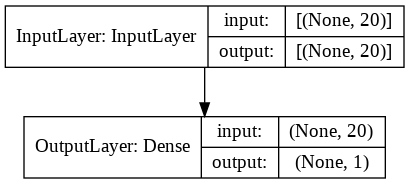

In [29]:
plot_model(model_first, show_shapes=True, to_file='keras_models/model_first.png', show_layer_names=True)

In [30]:
model_first.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model_first.fit(X_train, y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.8662 - accuracy: 0.4968
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.8534 - accuracy: 0.4758
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.8127 - accuracy: 0.4912
Epoch 4/50
50/50 [==============================] - 0s 964us/step - loss: 0.8055 - accuracy: 0.4945
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7889 - accuracy: 0.5038
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7801 - accuracy: 0.4877
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7666 - accuracy: 0.4836
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7431 - accuracy: 0.5020
Epoch 9/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7474 - accuracy: 0.4788
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.7400 - accuracy: 0.4914
Epoch 11/50
50/50

In [32]:
_ , accuracy = model_first.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5625
Accuracy: 56.2500


## Эксперимент №2
* 1 скрытый слой (функция активации - sigmoid, 5 нейронов)
* Функция активации выходного слоя - relu
* 100 эпох обучения

In [33]:
model_second = Sequential()
model_second.add(Input(20, name='InputLayer'))
model_second.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_second.add(Dense(1, activation='relu', name='OutputLayer'))

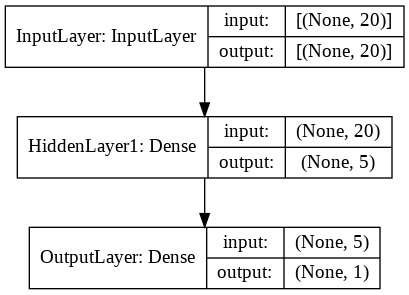

In [35]:
plot_model(model_second, show_shapes=True, to_file='keras_models/model_second.png', show_layer_names=True)

In [37]:
model_second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model_second.fit(X_train, y_train, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 1ms/step - loss: 7.7560 - accuracy: 0.4972
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 7.7111 - accuracy: 0.5001
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 8.0204 - accuracy: 0.4800
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 7.6975 - accuracy: 0.5010
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 7.8043 - accuracy: 0.4941
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 7.6055 - accuracy: 0.5069
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 7.8372 - accuracy: 0.4919
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 7.9576 - accuracy: 0.4841
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 7.6855 - accuracy: 0.5017
Epoch 10/100
50/50 [==============================] - 0s 1ms/step - loss: 7.8971 - accuracy: 0.4880
Epoch 11/

In [39]:
_ , accuracy = model_second.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 7.8667 - accuracy: 0.4900
Accuracy: 49.0000


## Эксперимент №3
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейронов)
* Функция активации выходного слоя - relu
* 150 эпох обучения

In [41]:
model_third = Sequential()
model_third.add(Input(20, name='InputLayer'))
model_third.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_third.add(Dense(3, name='HiddenLayer2', activation='sigmoid'),)
model_third.add(Dense(1, activation='relu', name='OutputLayer'))

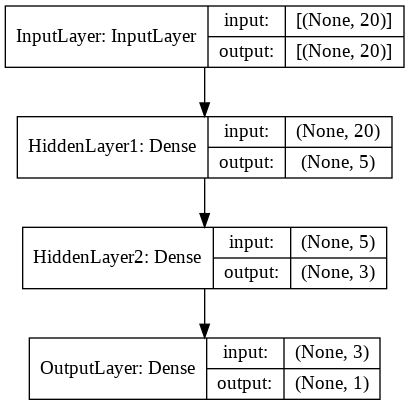

In [43]:
plot_model(model_third, show_shapes=True, to_file='keras_models/model_third.png', show_layer_names=True)

In [45]:
model_third.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model_third.fit(X_train, y_train, epochs=150)

Epoch 1/150
50/50 [==============================] - 0s 1ms/step - loss: 0.7198 - accuracy: 0.4994
Epoch 2/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4882
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4621
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4592
Epoch 5/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4670
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4703
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5010
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4812
Epoch 9/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5174
Epoch 10/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5002
Epoch 11/

In [47]:
_ , accuracy = model_third.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5575
Accuracy: 55.7500


## Эксперимент №4
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - relu, 4 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейрона)
* Функция активации выходного слоя - relu
* 300 эпох обучения

In [50]:
model_fourth = Sequential()
model_fourth.add(Input(20, name='InputLayer'))
model_fourth.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_fourth.add(Dense(4, name='HiddenLayer2', activation='relu'),)
model_fourth.add(Dense(3, name='HiddenLayer3', activation='sigmoid'),)
model_fourth.add(Dense(1, activation='relu', name='OutputLayer'))

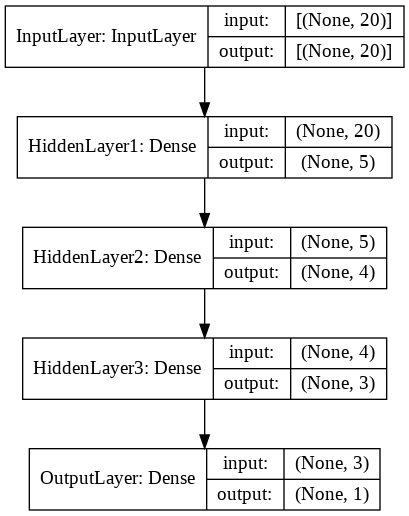

In [51]:
plot_model(model_fourth, show_shapes=True, to_file='keras_models/model_fourth.png', show_layer_names=True)

In [52]:
model_fourth.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model_fourth.fit(X_train, y_train, epochs=300)

Epoch 1/300
50/50 [==============================] - 1s 2ms/step - loss: 7.4452 - accuracy: 0.5173
Epoch 2/300
50/50 [==============================] - 0s 2ms/step - loss: 8.1031 - accuracy: 0.4747
Epoch 3/300
50/50 [==============================] - 0s 1ms/step - loss: 7.7791 - accuracy: 0.4957
Epoch 4/300
50/50 [==============================] - 0s 2ms/step - loss: 7.6695 - accuracy: 0.5028
Epoch 5/300
50/50 [==============================] - 0s 1ms/step - loss: 7.5900 - accuracy: 0.5079
Epoch 6/300
50/50 [==============================] - 0s 1ms/step - loss: 8.0872 - accuracy: 0.4757
Epoch 7/300
50/50 [==============================] - 0s 1ms/step - loss: 7.8456 - accuracy: 0.4914
Epoch 8/300
50/50 [==============================] - 0s 1ms/step - loss: 7.7958 - accuracy: 0.4946
Epoch 9/300
50/50 [==============================] - 0s 1ms/step - loss: 7.7748 - accuracy: 0.4960
Epoch 10/300
50/50 [==============================] - 0s 1ms/step - loss: 7.9137 - accuracy: 0.4870
Epoch 11/

In [54]:
_ , accuracy = model_fourth.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 7.8667 - accuracy: 0.4900
Accuracy: 49.0000


## Выводы
* Лучшее качество обеспечивает модель 1 (эксперимент №1)
* Время на обучение нейронной сети прямо пропорционально количеству эпох обучения
* Увеличение количества эпох улучшает качество моделей, однако потенциально может
привести к переобучению модели
* Для достижения наилучших результатов работы сети требуется перебирать различные
варианты ее архитектуры, комбинировать слои с различным количеством нейронов и различными
функциями активации
* качество моделей на основе нейронных сетей превосходит
качество всех классических моделей, соответствует качеству модели
на основе дерева решений (DecisionTreeClassifier)
(допускаю, что при дальнейшем подборе параметров можно превзойти
качество дерева решений)

## Сохранение и загрузка модели

In [55]:
model_fourth.save('keras_models/model_fourth')

INFO:tensorflow:Assets written to: keras_models/model_fourth/assets


In [58]:
model_fourth_reconstructed = load_model('keras_models/model_fourth')

In [59]:
print(model_fourth_reconstructed.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 5)                 105       
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 4)                 24        
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 3)                 15        
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 4         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
